In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout



C:\Users\barry\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_path = 'content/selected_columns_s2.txt'

with open(file_path, 'r') as file:
    selected_columns = [line.strip() for line in file]

print(selected_columns)

['gameid', 'playerid', 'plusminusPTS', 'estNETRTG', 'REBpct', 'estOFFRTG', 'DRB', 'FTM', 'uncontestedFGM', 'passes', 'ASTpct', 'touches', 'estUSGpct', 'oppPIP', 'TRB', 'oppFBPTS', 'PTS', 'estpace', 'FGpct', 'pie', 'DIST', 'defendedatrimFGA', 'BLK', '2ndPTS', 'TOVratio', 'pace', 'paceper40', '2ndAST', 'contestedFGA', 'OFFRTG', 'TSpct', 'FGM', '3Ppct', 'FTAST', 'STL', 'defendedatrimFGM', 'SEC', 'defendedatrimFGpct', 'oppPTSoffTOV', 'FBPTS', 'contestedFGM', '3PM', 'name', 'PIP', 'SPD', 'FTpct', 'PTSoffTOV', 'DEFRTG', 'team', 'home', 'win']


In [3]:
# selected_columns.append("gameid")
# selected_columns.append("win")

In [4]:
# len(selected_columns)

In [5]:
# df = pd.read_csv('content/LookingFoward_data_avg_d3_2.csv')

In [6]:
# df[selected_columns]

In [7]:
# df[selected_columns].to_csv('content/Looki.csv', index=False)

In [8]:
# data = df[selected_columns]

In [9]:
# data

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# 讀取訓練與測試資料集
train_data_path = 'pre_and_pos/pre_train_data_avg2.csv'
test_data_path = 'pre_and_pos/pos_test_data_avg2.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)


In [11]:
train_data = train_data[selected_columns]
test_data = test_data[selected_columns]

In [12]:

# 確認每個比賽有 30 行數據
num_rows_per_game = 30

# 初始化空列表來存放合併後的資料
def process_data(data):
    merged_data = []
    for i in range(0, len(data), num_rows_per_game):
        block = data.iloc[i:i+num_rows_per_game]
        gameid = block['gameid'].iloc[0]
        win = block['win'].iloc[0]
        team = block['team'].iloc[:15].unique()[0]
        opp_team = block['team'].iloc[15:].unique()[0]
        row_data = [gameid]
        for _, row in block.iterrows():
            row_data.extend(row.drop(['gameid', 'team', 'win']))
        row_data.extend([team, opp_team, win])
        merged_data.append(row_data)
    return pd.DataFrame(merged_data)

# 處理訓練和測試資料
test_merged_df = process_data(train_data)
train_merged_df = process_data(test_data)

# 設置適當的欄位名稱
column_names = ['gameid']
for player_num in range(1, num_rows_per_game + 1):
    for col in train_data.columns:
        if col not in ['gameid', 'team', 'win']:
            column_names.append(f'{col}_player_{player_num}')
column_names.extend(['team', 'opp_team', 'win'])

test_merged_df.columns = column_names
train_merged_df.columns = column_names

# 保存合併後的資料為CSV
test_merged_df.to_csv('merged_roll_drop_flat_test.csv', index=False)
train_merged_df.to_csv('merged_roll_drop_flat_train.csv', index=False)

# 準備特徵向量和目標變數
X_test = np.array(test_merged_df.drop(columns=['win']))
y_test = np.where(test_merged_df['win'] == 'TRUE', 1, 0)
y_test = to_categorical(y_test, 2)

X_train = np.array(train_merged_df.drop(columns=['win']))
y_train = np.where(train_merged_df['win'] == 'TRUE', 1, 0)
y_train = to_categorical(y_train, 2)

# 返回處理後的數據
X_test_df = pd.DataFrame(X_test, columns=test_merged_df.drop(columns=['win']).columns)
y_test_df = pd.DataFrame(y_test, columns=['Loss', 'Win'])
X_train_df = pd.DataFrame(X_train, columns=train_merged_df.drop(columns=['win']).columns)
y_train_df = pd.DataFrame(y_train, columns=['Loss', 'Win'])

X_test_df.to_csv('pre_and_pos_T/X_test.csv', index=False)
y_test_df.to_csv('pre_and_pos_T/y_test.csv', index=False)
X_train_df.to_csv('pre_and_pos_T/X_train.csv', index=False)
y_train_df.to_csv('pre_and_pos_T/y_train.csv', index=False)

'pre_and_pos_T/X_test.csv', 'pre_and_pos_T/y_test.csv', 'pre_and_pos_T/X_train.csv', 'pre_and_pos_T/y_train.csv'


('pre_and_pos_T/X_test.csv',
 'pre_and_pos_T/y_test.csv',
 'pre_and_pos_T/X_train.csv',
 'pre_and_pos_T/y_train.csv')

In [13]:
# data.gameid

In [14]:
# import pandas as pd


# # 確認每個比賽有 30 行數據
# num_rows_per_game = 30

# # 初始化空列表來存放合併後的資料
# merged_data = []

# # 用range來遍歷資料集，每次處理30行
# for i in range(0, len(data), num_rows_per_game):
#     # 取出當前30行
#     block = data.iloc[i:i+num_rows_per_game]

#     # 取出第一行的gameid, home, win
#     gameid = block['gameid'].iloc[0]
#     win = block['win'].iloc[0]

#     # 前15行為team, 後15行為opp_team
#     team = block['team'].iloc[:15].unique()[0]  # 取出前15行的team (假設都是同一隊)
#     opp_team = block['team'].iloc[15:].unique()[0]  # 取出後15行的team作為opp_team

#     # 把gameid放在合併的第一個欄位
#     row_data = [gameid]

#     # 將30行展平成一行，跳過 gameid、team、home、win 這些欄位
#     for _, row in block.iterrows():
#         row_data.extend(row.drop(['gameid', 'team', 'win']))

#     # 在最後添加 team, opp_team, home, win
#     row_data.extend([team, opp_team, win])

#     # 將展平的一行加入到結果列表
#     merged_data.append(row_data)

# # 創建合併後的DataFrame
# merged_df = pd.DataFrame(merged_data)

# # 為新DataFrame設置適當的欄位名稱
# column_names = ['gameid']
# for player_num in range(1, num_rows_per_game + 1):
#     for col in data.columns:
#         if col not in ['gameid', 'team', 'win']:  # 跳過這些欄位的名稱
#             column_names.append(f'{col}_player_{player_num}')

# # 添加 team, opp_team, home, win 的欄位名
# column_names.extend(['team', 'opp_team', 'win'])

# # 設定新的欄位名稱
# merged_df.columns = column_names

# # 保存合併後的資料為CSV
# merged_df.to_csv('merged_roll_drop_flat.csv', index=False)

In [15]:
# merged_df

In [16]:
shape = 1444

In [17]:
# merged_df = merged_df.drop(index=merged_df.index[:80])

In [18]:
# merged_df

In [19]:
# 將每場比賽中的所有球員數據合併成一個特徵向量
# X = []
# y = []

In [20]:
# y = np.array(merged_df['win'])

# # 勝負
# y = np.where(y == 'TRUE', 1, 0)
# y = to_categorical(y, 2)

In [21]:
# X = np.array(merged_df.drop(columns=['win']))
# X = pd.DataFrame(X)
# X

In [22]:
# Y = pd.DataFrame(y)

In [23]:
# Y

In [24]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle = False)
# X_train_df = pd.DataFrame(X_train)
# X_train_df.to_csv('content/X_trainA.csv', index=False)

In [25]:
X_train

array([[ 4.2200101e+07,  2.0311400e+05,  8.0000000e+00, ...,
         0.0000000e+00,  1.7000000e+01,  1.6000000e+01],
       [ 4.2200102e+07,  2.0311400e+05,  5.0000000e+00, ...,
         0.0000000e+00,  1.7000000e+01,  1.6000000e+01],
       [ 4.2200103e+07,  2.0271000e+05, -7.0000000e+00, ...,
         0.0000000e+00,  1.6000000e+01,  1.7000000e+01],
       ...,
       [ 5.2200131e+07,  1.6305300e+06,  8.0000000e+00, ...,
         0.0000000e+00,  1.9000000e+01,  2.1000000e+01],
       [ 5.2200201e+07,  2.0271000e+05, -6.5000000e+00, ...,
         0.0000000e+00,  1.6000000e+01,  5.0000000e+00],
       [ 5.2200211e+07,  1.6296380e+06,  4.5000000e+00, ...,
         0.0000000e+00,  1.8000000e+01,  2.1000000e+01]])

In [26]:
X_test

array([[ 2.2200001e+07,  1.6277590e+06,  0.0000000e+00, ...,
         0.0000000e+00,  3.0000000e+00,  2.3000000e+01],
       [ 2.2200002e+07,  2.0395200e+05,  0.0000000e+00, ...,
         0.0000000e+00,  1.0000000e+01,  1.4000000e+01],
       [ 2.2200003e+07,  1.6301800e+06,  0.0000000e+00, ...,
         0.0000000e+00,  9.0000000e+00,  2.2000000e+01],
       ...,
       [ 2.2201228e+07,  1.6290200e+06,  2.5000000e+00, ...,
         0.0000000e+00,  1.4000000e+01,  2.9000000e+01],
       [ 2.2201229e+07,  1.6290060e+06,  5.0000000e-01, ...,
         2.4000000e+01,  2.4000000e+01,  1.3000000e+01],
       [ 2.2201230e+07,  1.6314660e+06, -4.5000000e+00, ...,
         0.0000000e+00,  2.5000000e+01,  1.0000000e+01]])

In [27]:
y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [28]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [29]:
from sklearn.preprocessing import MinMaxScaler
# 標準化
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
print(X_test)

[[-1.99998800e+00  9.98040574e-01  5.36585366e-01 ...  0.00000000e+00
   7.40740741e-02  8.80000000e-01]
 [-1.99998790e+00  1.66761139e-03  5.36585366e-01 ...  0.00000000e+00
   3.33333333e-01  5.20000000e-01]
 [-1.99998780e+00  9.99734778e-01  5.36585366e-01 ...  0.00000000e+00
   2.96296296e-01  8.40000000e-01]
 ...
 [-1.99986530e+00  9.98923016e-01  5.97560976e-01 ...  0.00000000e+00
   4.81481481e-01  1.12000000e+00]
 [-1.99986520e+00  9.98913218e-01  5.48780488e-01 ...  1.00000000e+00
   8.51851852e-01  4.80000000e-01]
 [-1.99986510e+00  1.00063471e+00  4.26829268e-01 ...  0.00000000e+00
   8.88888889e-01  3.60000000e-01]]


In [31]:
print(X_test.shape)

(1230, 1443)


In [32]:
print(y_train)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [33]:
X_shape = shape-1

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras.layers import GRU, Conv1D, Attention
dropout_rate = 0.2

# Reshape the input data correctly
X_train = X_train.reshape(X_train.shape[0], 1, X_shape)  # (samples, time steps, features)
X_test = X_test.reshape(X_test.shape[0], 1, X_shape)    # (samples, time steps, features)

model = tf.keras.models.Sequential([
    LSTM(80, activation=tf.nn.tanh, return_sequences=True, input_shape=(1, X_shape)), # Correct input shape
    Dropout(dropout_rate),
    LSTM(60, activation=tf.nn.tanh, return_sequences=True),
    Dropout(dropout_rate),
    GRU(units=60, return_sequences=True),
    Dropout(dropout_rate),
    LSTM(40, activation=tf.nn.tanh),
    Dropout(dropout_rate),
    Dense(20, activation=tf.nn.sigmoid),
    Dropout(dropout_rate),
    Dense(2, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
model.fit(X_train, y_train, epochs=30, batch_size=32)

# 评估模型
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"模型准确性: {accuracy:.3f}")

Epoch 1/30
3/3 [==============================] - 7s 8ms/step - loss: 0.8064 - accuracy: 0.4111
Epoch 2/30
3/3 [==============================] - 0s 47ms/step - loss: 0.8023 - accuracy: 0.4111
Epoch 3/30
3/3 [==============================] - 0s 8ms/step - loss: 0.7503 - accuracy: 0.4333
Epoch 4/30
3/3 [==============================] - 0s 8ms/step - loss: 0.7875 - accuracy: 0.4333
Epoch 5/30
3/3 [==============================] - 0s 10ms/step - loss: 0.7130 - accuracy: 0.4778
Epoch 6/30
3/3 [==============================] - 0s 9ms/step - loss: 0.7360 - accuracy: 0.4556
Epoch 7/30
3/3 [==============================] - 0s 14ms/step - loss: 0.6866 - accuracy: 0.5778
Epoch 8/30
3/3 [==============================] - 0s 8ms/step - loss: 0.7251 - accuracy: 0.4556
Epoch 9/30
3/3 [==============================] - 0s 11ms/step - loss: 0.7003 - accuracy: 0.5111
Epoch 10/30
3/3 [==============================] - 0s 9ms/step - loss: 0.6924 - accuracy: 0.5333
Epoch 11/30
3/3 [==================

In [35]:
ModelSave = "modelGUR_avg_2"

In [36]:
# 保存模型到指定的文件路徑
model.save(ModelSave + '.h5')

# 保存模型架構到 JSON 格式
model_json = model.to_json()
with open(ModelSave + '.h5''.json', 'w') as json_file:
    json_file.write(model_json)

In [37]:
model.save(ModelSave + '.keras')


39/39 [==============================] - 2s 3ms/step


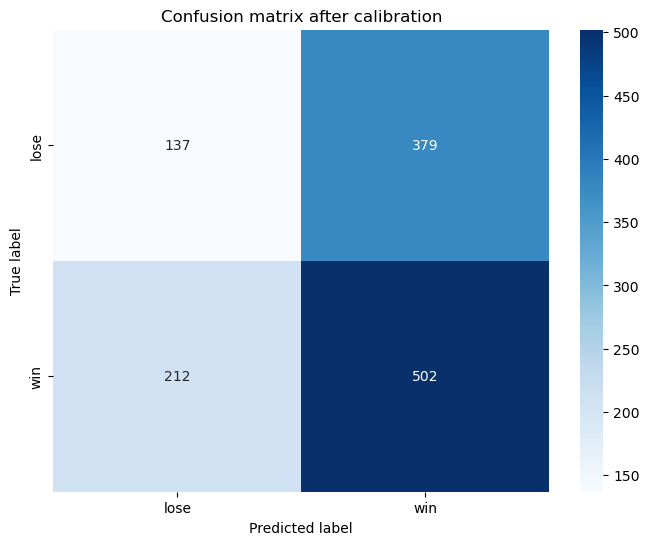

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
# 1. 使用模型進行預測
y_pred_probs = model.predict(X_test)  # 預測的機率
y_pred = np.argmax(y_pred_probs, axis=1)  # 將預測的機率轉換為類別

# 2. 確保 y_test 是標籤（如果它是 one-hot 編碼的，需要轉換）
if y_test.shape[1] > 0:  # 如果 y_test 是 one-hot 編碼
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test

# 3. 計算混淆矩陣
cm = confusion_matrix(y_test_labels, y_pred)

# 4. 繪製混淆矩陣
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["lose", "win"], yticklabels=["lose", "win"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion matrix after calibration")
plt.show()

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss, accuracy_score, confusion_matrix
from sklearn.base import clone, BaseEstimator, ClassifierMixin # Import BaseEstimator and ClassifierMixin
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# ... (Your existing code for model creation and training) ...

# Update KerasClassifier to inherit from BaseEstimator and ClassifierMixin and implement clone method
class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model
        self.classes_ = [0, 1]  # Add this line to define classes_

    def predict_proba(self, X):
        # Ensure X has the correct shape for the LSTM model
        # X = X.reshape(X.shape[0], 1, X_shape)
        X = X.reshape(X.shape[0], X.shape[1], X.shape[2])  # 根據實際形狀進行修改

        # Get raw predictions
        y_pred = self.model.predict(X)

        # Assuming binary classification, return probabilities
        return y_pred

    def predict(self, X):
        # Get probabilities
        probs = self.predict_proba(X)

        # Return the class with the highest probability
        return np.argmax(probs, axis=1)

    def fit(self, X, y):
        # This is a dummy fit method. The model is assumed to be already trained.
        # If you need to re-train, implement the logic here.
        # Manually set classes_ during fit
        self.classes_ = np.unique(y)  # Add this line
        pass

    def get_params(self, deep=True):
        # Return a dictionary of the model's parameters
        # (This may need to be adjusted depending on your specific TensorFlow model)
        return {}

    def set_params(self, **parameters):
        # Update the model's parameters
        # (This may need to be adjusted depending on your specific TensorFlow model)
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    # Implement the clone method for KerasClassifier
    def __sklearn_clone__(self, make_deep=False):
        """
        Since `clone` doesn't know how to handle custom classes like `KerasClassifier`,
        we implement a custom `__sklearn_clone__` method to handle the cloning process.

        This method creates a new instance of `KerasClassifier` with the same model.
        """
        new_classifier = type(self)(self.model) # Pass the model during instantiation
        return new_classifier

# ... (Your existing code for model creation and training) ...

# Now you can use the wrapper in CalibratedClassifierCV
keras_clf = KerasClassifier(model)

# Convert y_train to 1D for CalibratedClassifierCV
# y_train_1d = np.argmax(y_train.values, axis=1)  # Assuming y_train is a DataFrame
y_train_1d = np.argmax(y_train, axis=1)  # y_train 是 NumPy 陣列


calibrated_model = CalibratedClassifierCV(keras_clf, method='sigmoid', cv=5)
calibrated_model.fit(X_train, y_train_1d)  # Use the 1D target array


1/1 [==============================] - 0s 25ms/step


CalibratedClassifierCV(cv=5, estimator=KerasClassifier())

In [41]:
# Now you can use the wrapper in CalibratedClassifierCV
keras_clf = KerasClassifier(model)

# Convert y_train to 1D for CalibratedClassifierCV
y_train_1d = np.argmax(y_train.values, axis=1)  # Assuming y_train is a DataFrame

calibrated_model = CalibratedClassifierCV(keras_clf, method='sigmoid', cv=5)
calibrated_model.fit(X_train, y_train_1d)  # Use the 1D target array



# ... (Rest of your code) ...

# 獲取校準後的預測概率
y_prob_calibrated = calibrated_model.predict_proba(X_test)[:, 1]

# 進行預測並評估模型
y_pred_calibrated = calibrated_model.predict(X_test)

# Convert y_test to binary format if it's in multilabel-indicator format
# Assuming y_test is a DataFrame or a 2D NumPy array
y_test_binary = np.argmax(y_test.values, axis=1)
cm = confusion_matrix(y_test_binary, y_pred_calibrated)
# Now calculate accuracy with consistent formats
accuracy = accuracy_score(y_test_binary, y_pred_calibrated)
brier_score = brier_score_loss(y_test_binary, y_prob_calibrated) # y_prob_calibrated is expected to be for the positive class


print(f"校準後的準確率: {accuracy}")
print(f"Brier 損失分數: {brier_score}")


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [42]:
# 畫出校準曲線
from sklearn.calibration import calibration_curve

plt.figure(figsize=(10, 8))
# ... (Rest of your code) ...

# Convert y_test to 1D for calibration_curve using argmax
y_test_1d = np.argmax(y_test.values, axis=1)  # Assuming y_test is a DataFrame or a 2D NumPy array

# Calculate calibration curve using the 1D version of y_test
fraction_of_positives, mean_predicted_value = calibration_curve(y_test_1d, y_prob_calibrated, n_bins=10)

# ... (Rest of your code) ...

plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Calibrated Model")
plt.plot([0, 1], [0, 1], "k--", label="Perfectly calibrated")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.legend()
plt.title("Calibration plot")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

<Figure size 1000x800 with 0 Axes>

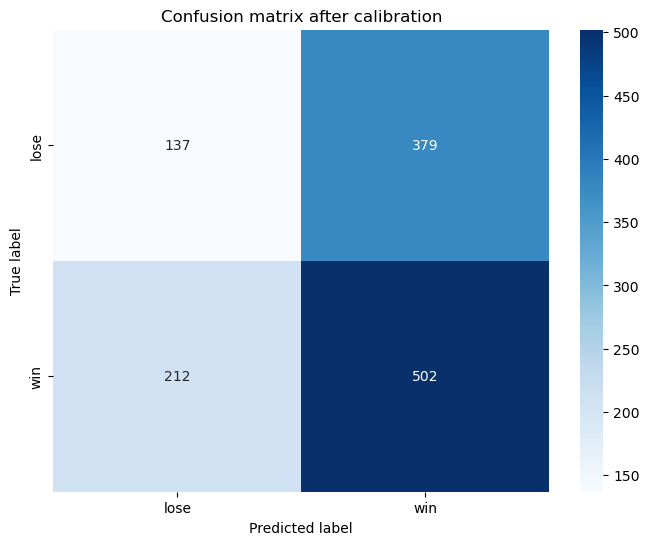

In [43]:
# 生成混淆矩陣

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["lose","win"], yticklabels=["lose","win"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion matrix after calibration")
plt.show()

39/39 [==============================] - 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.27      0.32       516
           1       0.57      0.70      0.63       714

    accuracy                           0.52      1230
   macro avg       0.48      0.48      0.47      1230
weighted avg       0.50      0.52      0.50      1230

Confusion Matrix:
[[137 379]
 [212 502]]


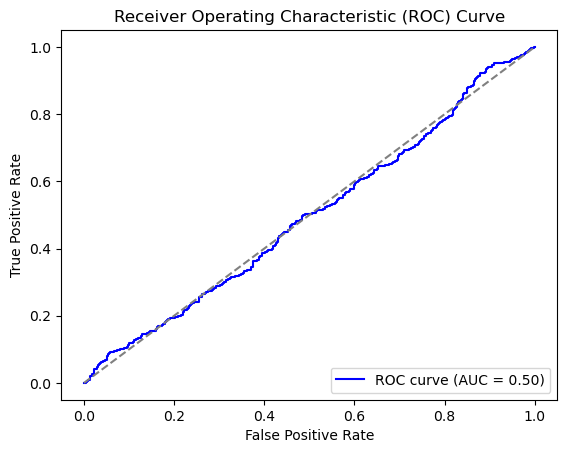

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# 取得模型預測的概率分數
y_pred_prob = model.predict(X_test)

# 將概率轉換為類別
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_classes = np.argmax(y_test, axis=1)  # 將 one-hot 編碼轉回類別

# 1. 計算分類報告
print("Classification Report:")
print(classification_report(y_test_classes, y_pred))

# 2. 混淆矩陣
conf_matrix = confusion_matrix(y_test_classes, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 3. 計算ROC和AUC
fpr, tpr, _ = roc_curve(y_test_classes, y_pred_prob[:, 1])  # 假設類別1為正類
roc_auc = roc_auc_score(y_test_classes, y_pred_prob[:, 1])

# 繪製ROC曲線
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [45]:
# 檢查 y_train 和 y_test 的形狀
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


y_train shape: (90, 2)
y_test shape: (1230, 2)


In [46]:
model.save(ModelSave + '.keras')
model.save(ModelSave + '.h5')